<a href="https://colab.research.google.com/github/DhakalSumi/NLP-Project/blob/main/NLP_Project_Sumi_06_05_25.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this project, you’ll work on predicting whether a tweet is about a real disaster or not. The dataset provides 10,000 labeled tweets, and your task is to classify each tweet into two categories: disaster (1) or non-disaster (0).

**The Dataset**

The dataset consists of the following:
train.csv: This file contains both the tweet text and the target label (target). You’ll use this data to train your model.
text: The tweet content.
target: 1 if the tweet is about a disaster, 0 otherwise.
You will use the train.csv for training your model.

**Data Loading**

In [ ]:
import pandas as pd

#load data
train_data = pd.read_csv('/content/train.csv')
texts = train_data['text']
labels = train_data['target']

In [ ]:
train_data

,text,target
0,Our Deeds are the Reason of this #earthquake M...,1
1,Forest fire near La Ronge Sask. Canada,1
2,All residents asked to 'shelter in place' are ...,1
3,"13,000 people receive #wildfires evacuation or...",1
4,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...
7608,Two giant cranes holding a bridge collapse int...,1
7609,@aria_ahrary @TheTawniest The out of control w...,1
7610,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,Police investigating after an e-bike collided ...,1


In [ ]:
texts

,text
0,Our Deeds are the Reason of this #earthquake M...
1,Forest fire near La Ronge Sask. Canada
2,All residents asked to 'shelter in place' are ...
3,"13,000 people receive #wildfires evacuation or..."
4,Just got sent this photo from Ruby #Alaska as ...
...,...
7608,Two giant cranes holding a bridge collapse int...
7609,@aria_ahrary @TheTawniest The out of control w...
7610,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...
7611,Police investigating after an e-bike collided ...


In [ ]:
labels

,target
0,1
1,1
2,1
3,1
4,1
...,...
7608,1
7609,1
7610,1
7611,1


**Text Preprocessing**

In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess(text):
  text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE) #Remove URLs
  text = re.sub(r'\@w+|\#','', text)  # Remove mentions and hashtags
  text = re.sub(r'[^A-Za-z0-9\s]', '', text)  # Remove punctuation
  text = text.lower().strip()
  tokens = text.split()
  tokens = [lemmatizer.lemmatize(word)for word in tokens if word not in stop_words]
  return " ".join(tokens)

cleaned_text = texts.apply(preprocess)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
cleaned_text

,text
0,deed reason earthquake may allah forgive u
1,forest fire near la ronge sask canada
2,resident asked shelter place notified officer ...
3,13000 people receive wildfire evacuation order...
4,got sent photo ruby alaska smoke wildfire pour...
...,...
7608,two giant crane holding bridge collapse nearby...
7609,ariaahrary thetawniest control wild fire calif...
7610,m194 0104 utc5km volcano hawaii
7611,police investigating ebike collided car little...


**Text Vectorization(TF-IDF)**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(cleaned_text)

print(X)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 56119 stored elements and shape (7613, 5000)>
  Coords	Values
  (0, 1238)	0.564646052899242
  (0, 3749)	0.4134335742724588
  (0, 1499)	0.387532356597266
  (0, 2752)	0.349542310246293
  (0, 218)	0.48773595371620837
  (1, 1807)	0.42782425398516116
  (1, 1755)	0.30729807760383887
  (1, 3027)	0.4404023261193473
  (1, 2435)	0.48642753839000874
  (1, 707)	0.5403409481498974
  (2, 3851)	0.29153403877105855
  (2, 325)	0.28716442274504234
  (2, 4138)	0.6044134298193359
  (2, 3424)	0.48256388518232285
  (2, 3168)	0.24249840754724872
  (2, 1612)	0.2220923170142637
  (2, 3226)	0.2357344861385725
  (2, 1642)	0.26581907046782366
  (3, 1612)	0.34417977143293954
  (3, 3226)	0.3653212441060017
  (3, 28)	0.4788163967901145
  (3, 3353)	0.26818852340792637
  (3, 3752)	0.5081851164120779
  (3, 4881)	0.3172963863861597
  (3, 685)	0.29658276797876865
  :	:
  (7610, 4786)	0.42012981059936577
  (7610, 2669)	0.5352933086453343
  (7610, 2025)	0.484616

**Model Selection**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

**Model Evaluation**

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print(precision_score(y_test, y_pred))
print(recall_score(y_test, y_pred))
print(f1_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.89      0.84       874
           1       0.82      0.68      0.74       649

    accuracy                           0.80      1523
   macro avg       0.80      0.78      0.79      1523
weighted avg       0.80      0.80      0.79      1523

[[777  97]
 [210 439]]
0.7984241628365069
0.8190298507462687
0.6764252696456087
0.7409282700421941


**Hyperparameter Tuning (Optional)**

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 1, 10],
    'solver': ['liblinear', 'saga']
}

grid = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid.fit(X_train, y_train)
print("Best Parameters:", grid.best_params_)


Best Parameters: {'C': 1, 'solver': 'liblinear'}


# **Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [ ]:
#Evaluate the Model

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

rf_pred = rf_model.predict(X_test)
print(classification_report(y_test, rf_pred))
print(confusion_matrix(y_test, rf_pred))
print(accuracy_score(y_test, rf_pred))
print(precision_score(y_test, rf_pred))
print(recall_score(y_test, rf_pred))
print(f1_score(y_test, rf_pred))

              precision    recall  f1-score   support

           0       0.78      0.84      0.81       874
           1       0.76      0.68      0.72       649

    accuracy                           0.77      1523
   macro avg       0.77      0.76      0.76      1523
weighted avg       0.77      0.77      0.77      1523

[[733 141]
 [206 443]]
0.7721602101116218
0.7585616438356164
0.6825885978428351
0.7185725871857259


In [ ]:
#Hyperparameter Tuning

from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 250, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
}

grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3, n_jobs=-1)
grid_rf.fit(X_train, y_train)

print("Best Parameters for Random Forest:", grid_rf.best_params_)


Best Parameters for Random Forest: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}


**Visualization**

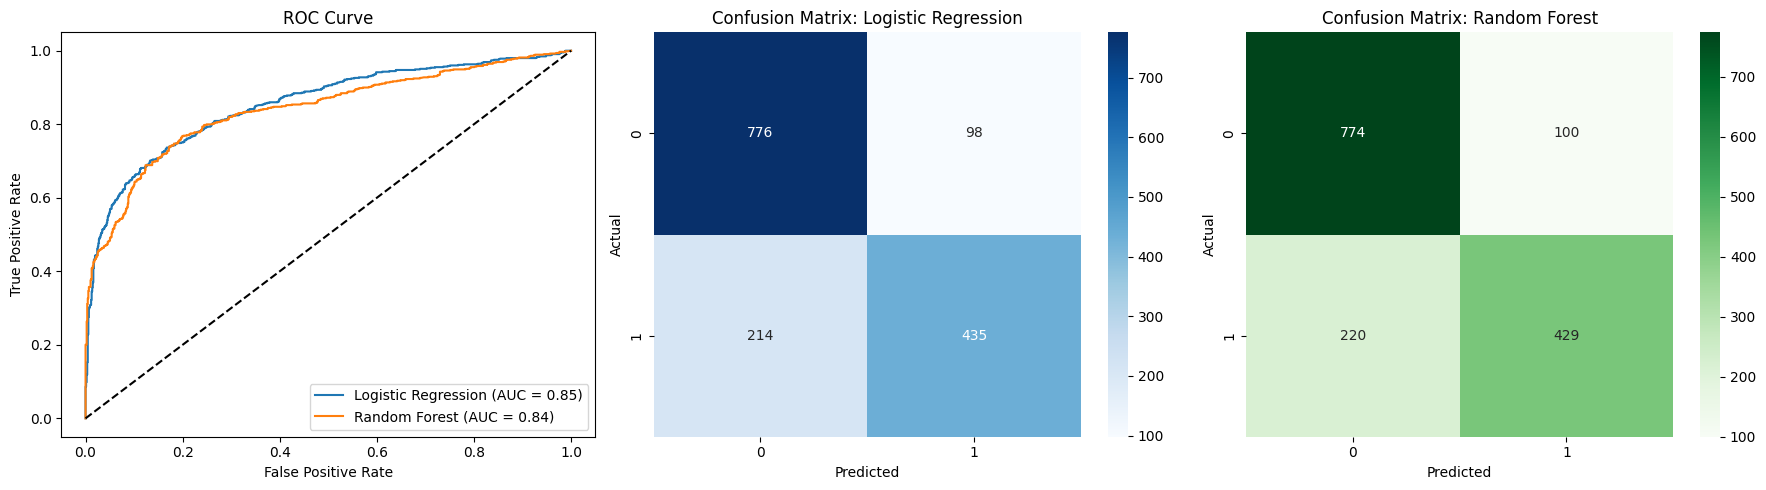

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv('train.csv')

# Text Preprocessing
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X = vectorizer.fit_transform(df['text'])
y = df['target']

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Models
lr_model = LogisticRegression(C=1, solver='liblinear')
rf_model = RandomForestClassifier(n_estimators=100, max_depth=None, min_samples_split=5, min_samples_leaf=1, random_state=42)

lr_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

# Predictions & Probabilities
lr_probs = lr_model.predict_proba(X_test)[:, 1]
rf_probs = rf_model.predict_proba(X_test)[:, 1]

lr_preds = lr_model.predict(X_test)
rf_preds = rf_model.predict(X_test)

# ROC Curve
fpr_lr, tpr_lr, _ = roc_curve(y_test, lr_probs)
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_probs)
auc_lr = auc(fpr_lr, tpr_lr)
auc_rf = auc(fpr_rf, tpr_rf)

# Confusion Matrices
cm_lr = confusion_matrix(y_test, lr_preds)
cm_rf = confusion_matrix(y_test, rf_preds)

# Plotting
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# ROC Curve
axes[0].plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {auc_lr:.2f})')
axes[0].plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.2f})')
axes[0].plot([0, 1], [0, 1], 'k--')
axes[0].set_title('ROC Curve')
axes[0].set_xlabel('False Positive Rate')
axes[0].set_ylabel('True Positive Rate')
axes[0].legend()

# Confusion Matrix: Logistic Regression
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', ax=axes[1])
axes[1].set_title("Confusion Matrix: Logistic Regression")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")

# Confusion Matrix: Random Forest
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens', ax=axes[2])
axes[2].set_title("Confusion Matrix: Random Forest")
axes[2].set_xlabel("Predicted")
axes[2].set_ylabel("Actual")

plt.tight_layout()
plt.show()


**LSTM on Disaster Tweets**

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
86/86 ━━━━━━━━━━━━━━━━━━━━ 8s 75ms/step - accuracy: 0.5537 - loss: 0.6867 - val_accuracy: 0.5698 - val_loss: 0.6863
Epoch 2/5
86/86 ━━━━━━━━━━━━━━━━━━━━ 10s 70ms/step - accuracy: 0.5741 - loss: 0.6836 - val_accuracy: 0.5698 - val_loss: 0.6846
Epoch 3/5
86/86 ━━━━━━━━━━━━━━━━━━━━ 10s 72ms/step - accuracy: 0.5687 - loss: 0.6840 - val_accuracy: 0.5698 - val_loss: 0.6836
Epoch 4/5
86/86 ━━━━━━━━━━━━━━━━━━━━ 5s 63ms/step - accuracy: 0.5610 - loss: 0.6876 - val_accuracy: 0.5698 - val_loss: 0.6854
Epoch 5/5
86/86 ━━━━━━━━━━━━━━━━━━━━ 10s 64ms/step - accuracy: 0.5544 - loss: 0.6900 - val_accuracy: 0.5698 - val_loss: 0.6835
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step

Classification Report:

              precision    recall  f1-score   support

           0       0.57      1.00      0.73       874
           1       0.00      0.00      0.00       649

    accuracy                           0.57      1523
   macro avg       0.29      0.50      0.36      1523
weighted avg       0.33      0

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


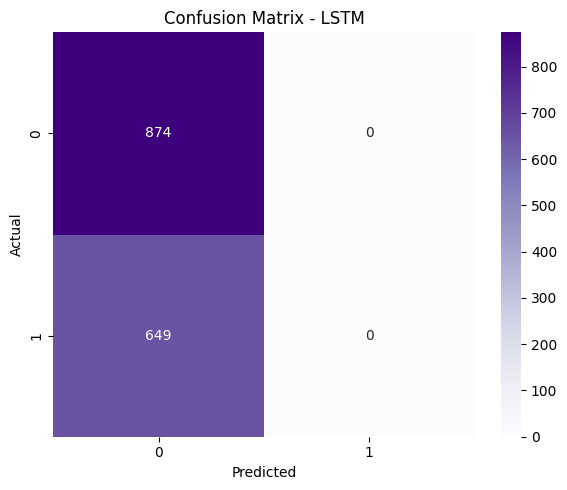

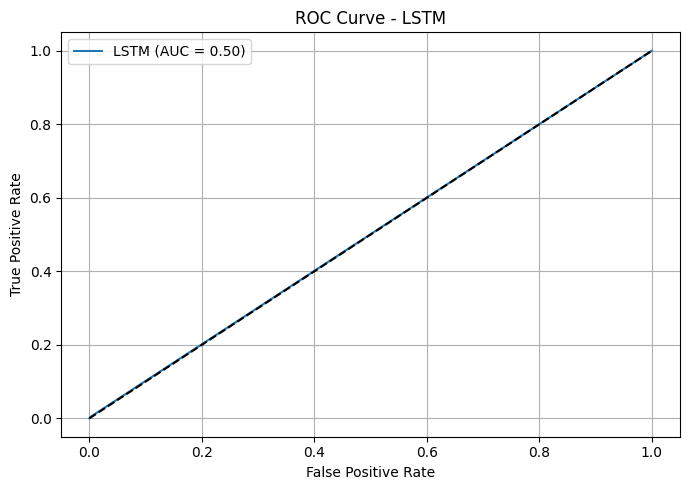

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

# 1. Load data
df = pd.read_csv("/content/train.csv")
texts = df["text"].astype(str).values
labels = df["target"].values

# 2. Tokenize and pad
MAX_NUM_WORDS = 10000
MAX_SEQUENCE_LENGTH = 100
EMBEDDING_DIM = 100

tokenizer = Tokenizer(num_words=MAX_NUM_WORDS, oov_token="<OOV>")
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
padded = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH, padding='post', truncating='post')

# 3. Train/Test split
X_train, X_test, y_train, y_test = train_test_split(padded, labels, test_size=0.2, random_state=42)

# 4. LSTM model
model = Sequential([
    Embedding(MAX_NUM_WORDS, EMBEDDING_DIM, input_length=MAX_SEQUENCE_LENGTH),
    LSTM(64, return_sequences=False),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

# 5. Train
history = model.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.1)

# 6. Predict and Evaluate
y_pred_probs = model.predict(X_test).flatten()
y_pred = (y_pred_probs > 0.5).astype(int)

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples')
plt.title("Confusion Matrix - LSTM")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_probs)
auc_score = auc(fpr, tpr)

plt.figure(figsize=(7,5))
plt.plot(fpr, tpr, label=f"LSTM (AUC = {auc_score:.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - LSTM")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
